In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy.stats as stats
# from scipy.stats import linregress
# from scipy.stats.stats import pearsonr
import warnings
%matplotlib inline

In [2]:
# Read-in data as Excel file
vix_data_file = "C:/Users/blake/Desktop/spx_vix_clean.xlsx"

In [3]:
#Convert Excel file to Dataframe
stock_data_df = pd.read_excel(vix_data_file,
sheet_name=0,
header=1,
index_col=False,
keep_default_na=False
)

In [4]:
stock_data_df.head()

,Date,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,stdev,1/stdev,SPX_VOLUME,SPX_5day,SPX_tom,A_Delta
0,2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35,1.172737,0.852706,636905,NaN,1132.98,17.88
1,2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,1.287977,0.776412,636905,NaN,1132.98,0.00
2,2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,1.287977,0.776412,1282633,NaN,1136.52,3.54
3,2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70,1.386655,0.721160,1368386,NaN,1137.14,0.62
4,2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30,1.511385,0.661645,1252015,1130.944,1141.69,4.55


In [5]:
#Create new Dataframe, set 'Date' as index, drop column named 'Date' 
time_indexed_stock_df = stock_data_df.set_index(stock_data_df['Date'])
time_indexed_stock_df = time_indexed_stock_df.drop(['Date'], axis=1)
time_indexed_stock_df.head()

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,stdev,1/stdev,SPX_VOLUME,SPX_5day,SPX_tom,A_Delta
Date,,,,,,,,,,,,,,,
2009-12-31,1115.10,22.95,25.80,26.00,26.30,26.35,26.30,26.40,26.35,1.172737,0.852706,636905,NaN,1132.98,17.88
2010-01-01,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,1.287977,0.776412,636905,NaN,1132.98,0.00
2010-01-04,1132.98,22.10,24.85,25.25,25.75,25.75,25.75,25.85,25.95,1.287977,0.776412,1282633,NaN,1136.52,3.54
2010-01-05,1136.52,21.55,24.45,24.85,25.45,25.50,25.50,25.55,25.70,1.386655,0.721160,1368386,NaN,1137.14,0.62
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30,1.511385,0.661645,1252015,1130.944,1141.69,4.55


In [6]:
#Drop NaN rows
spx_5day_df = time_indexed_stock_df.dropna()
spx_5day_df.head()

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,stdev,1/stdev,SPX_VOLUME,SPX_5day,SPX_tom,A_Delta
Date,,,,,,,,,,,,,,,
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30,1.511385,0.661645,1252015,1130.944,1141.69,4.55
2010-01-07,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10,1.575425,0.634749,1553963,1136.262,1144.98,3.29
2010-01-08,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90,1.714317,0.583323,1508175,1138.662,1146.98,2.00
2010-01-11,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65,1.760479,0.568027,1444997,1141.462,1136.22,-10.76
2010-01-12,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75,1.513511,0.660716,2089364,1141.402,1145.68,9.46


In [62]:
spx_5day_df.tail()

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,1/stdev,SPX_VOLUME,SPX_5day
Date,,,,,,,,,,,,
2019-09-02,2906.27,19.525,19.525,19.425,19.025,19.475,19.525,19.350,19.375,5.964031,1642516,2902.882
2019-09-03,2906.27,19.525,19.525,19.425,19.025,19.475,19.525,19.350,19.375,5.964031,1999829,2910.304
2019-09-04,2937.78,18.075,18.675,18.675,18.400,18.875,18.975,18.825,18.925,3.280271,1252834,2920.272
2019-09-05,2976.00,17.275,18.225,18.375,18.175,18.675,18.725,18.600,18.700,2.070131,1669999,2930.556
2019-09-06,2978.71,16.525,17.725,18.075,17.875,18.425,18.525,18.425,18.475,1.494349,1182287,2941.006


In [7]:
output_df = spx_5day_df.filter(['SPX_tom', 'A_Delta'], axis=1)
output_df.head()

,SPX_tom,A_Delta
Date,,
2010-01-06,1141.69,4.55
2010-01-07,1144.98,3.29
2010-01-08,1146.98,2.00
2010-01-11,1136.22,-10.76
2010-01-12,1145.68,9.46


In [8]:
#Create list
#If "actual delta" > 0 (meaning tomorrow's price is higher than today's price)
#Assign "Buy" = 1, "Don't Buy" = 0
result_list = []
for i in range(0, len(output_df['A_Delta'])):
    if output_df['A_Delta'][i] > 0:
        result_list.append(1)
    else:
        result_list.append(0)

print(result_list[:10])

[1, 1, 1, 0, 1, 1, 0, 1, 0, 0]


In [9]:
#Create Numpy array of list and prepare for "y-train" "y-test"

y_train_data = np.asarray(result_list[:2048])
y_test_data = np.asarray(result_list[2048:])
print(y_train_data.shape)
#Reshape array for later ML model
# y_train = y_train_data.reshape(-1, 1)
# y_test = y_test_data.reshape(-1,1)
y_train = y_train_data
y_test = y_test_data

print(y_train.shape)
print(y_test.shape)
y_train


(2048,)
(2048,)
(475,)


array([1, 1, 1, ..., 0, 0, 1])

In [10]:
output_df['Act_Result'] = result_list
output_df.head()

,SPX_tom,A_Delta,Act_Result
Date,,,
2010-01-06,1141.69,4.55,1
2010-01-07,1144.98,3.29,1
2010-01-08,1146.98,2.00,1
2010-01-11,1136.22,-10.76,0
2010-01-12,1145.68,9.46,1


In [11]:
spx_5day_df = spx_5day_df.drop(columns=['stdev','SPX_tom', 'A_Delta'])

In [12]:
spx_5day_df.head()

,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,1/stdev,SPX_VOLUME,SPX_5day
Date,,,,,,,,,,,,
2010-01-06,1137.14,20.80,23.55,24.20,24.95,25.05,25.05,25.10,25.30,0.661645,1252015,1130.944
2010-01-07,1141.69,20.45,23.15,23.85,24.75,24.85,24.85,24.90,25.10,0.634749,1553963,1136.262
2010-01-08,1144.98,19.90,22.55,23.40,24.40,24.65,24.60,24.75,24.90,0.583323,1508175,1138.662
2010-01-11,1146.98,19.50,22.25,23.25,24.15,24.30,24.40,24.50,24.65,0.568027,1444997,1141.462
2010-01-12,1136.22,20.25,22.80,23.65,24.25,24.45,24.45,24.60,24.75,0.660716,2089364,1141.402


In [13]:
X_data = spx_5day_df.to_numpy()
print("X-Dim Total:")
print(X_data.shape[0])
print(X_data.shape[1])


X-Dim Total:
2523
12


In [14]:
train_df = spx_5day_df[:2048] 
test_df = spx_5day_df[2048:]

In [15]:

train_data = train_df.to_numpy()
print("x-train Dimensions:")
print(train_data.shape[0])
print(train_data.shape[1])
print("")

test_data = test_df.to_numpy()
print("x-test Dimensions:")
print(test_data.shape[0])
print(test_data.shape[1])
print("Note: Before Reshaping")

x-train Dimensions:
2048
12

x-test Dimensions:
475
12
Note: Before Reshaping


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [17]:
# #julia
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# X_scaled = scaler.fit_transform(train_data)


x_train = train_data.reshape(train_data.shape[0], 1,train_data.shape[1])
print(x_train.shape)

(2048, 1, 12)


In [18]:
x_test = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])
print(x_test.shape)
print(x_test)

(475, 1, 12)
[[[0.34640465 0.08571429 0.08708709 ... 0.02732945 0.21578845 0.26306863]]

 [[0.33755706 0.1037037  0.08108108 ... 0.0276427  0.32874595 0.25902771]]

 [[0.31643844 0.14603175 0.11111111 ... 0.03360668 0.39876647 0.24881038]]

 ...

 [[0.8694647  0.35873016 0.44144144 ... 0.23297416 0.26029304 0.834559  ]]

 [[0.92610706 0.32486772 0.41441441 ... 0.14161645 0.3494238  0.85221272]]

 [[0.9301233  0.29312169 0.38438438 ... 0.09814865 0.24522009 0.87015141]]]


In [19]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [20]:
from tensorflow.keras.layers import LSTM

model.add(LSTM(32, input_shape=(x_train.shape[1], x_train.shape[2])))


W0930 10:40:19.096516 16872 deprecation.py:506] From C:\Users\blake\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
from tensorflow.keras.layers import Dense, Activation
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5760      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0930 10:40:19.855996 16872 deprecation.py:323] From C:\Users\blake\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5760      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# # Fit (train) the model
# model.fit(
#     x_train,
#     y_train_categorical,
#     epochs=1000,
#     shuffle=True,
#     verbose=2
# )

In [26]:
model.fit(x_train, y_train, shuffle=False, epochs=100, batch_size=1)

Epoch 1/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.6929 - acc: 0.5176
Epoch 2/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6926 - acc: 0.5229
Epoch 3/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6923 - acc: 0.5239
Epoch 4/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 0.6921 - acc: 0.5288
Epoch 5/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6919 - acc: 0.5283
Epoch 6/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6917 - acc: 0.5264
Epoch 7/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6915 - acc: 0.5278
Epoch 8/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6913 - acc: 0.5278
Epoch 9/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6910 - acc: 0.5303
Epoch 10/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6908 - acc: 0.532

2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6868 - acc: 0.5498
Epoch 82/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.6867 - acc: 0.5498
Epoch 83/100
2048/2048 [==============================] - 9s 4ms/sample - loss: 0.6867 - acc: 0.5488
Epoch 84/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6867 - acc: 0.5498
Epoch 85/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6866 - acc: 0.5503
Epoch 86/100
2048/2048 [==============================] - 9s 4ms/sample - loss: 0.6866 - acc: 0.5508
Epoch 87/100
2048/2048 [==============================] - 9s 5ms/sample - loss: 0.6866 - acc: 0.5508
Epoch 88/100
2048/2048 [==============================] - 9s 4ms/sample - loss: 0.6865 - acc: 0.5513
Epoch 89/100
2048/2048 [==============================] - 9s 4ms/sample - loss: 0.6865 - acc: 0.5508
Epoch 90/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 0.6865 - acc: 0.5522
Ep

In [27]:
# history = model.fit(X, y, batch_size=1, epochs=100, verbose=0)

In [28]:
predictions = model.predict_classes(x_test, verbose=0)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)
r2

-0.8731348586045189

In [30]:
predicted_df = output_df[2048:].copy()

predicted_df['Predicted_tomorrow']=predictions

predicted_df.head(20)

,SPX_tom,A_Delta,Act_Result,Predicted_tomorrow
Date,,,,
2017-11-13,2578.87,-5.97,0,0
2017-11-14,2564.62,-14.25,0,1
2017-11-15,2585.64,21.02,1,1
2017-11-16,2578.85,-6.79,0,1
2017-11-17,2582.14,3.29,1,1
2017-11-20,2599.03,16.89,1,0
2017-11-21,2597.08,-1.95,0,1
2017-11-22,2602.42,5.34,1,0
2017-11-23,2602.42,0.00,0,0


In [31]:
final_df = predicted_df.join(spx_5day_df)
final_df.head()

,SPX_tom,A_Delta,Act_Result,Predicted_tomorrow,SPX,VIX_1,VIX_2,VIX_3,VIX_4,VIX_5,VIX_6,VIX_7,VIX_8,1/stdev,SPX_VOLUME,SPX_5day
Date,,,,,,,,,,,,,,,,
2017-11-13,2578.87,-5.97,0,0,2584.84,11.625,12.775,13.925,14.725,15.375,15.925,16.375,16.725,0.556265,1044536,2587.356
2017-11-14,2564.62,-14.25,0,1,2578.87,12.050,12.675,14.000,14.825,15.475,16.075,16.525,16.925,0.560414,1573219,2585.002
2017-11-15,2585.64,21.02,1,1,2564.62,13.050,13.175,14.325,15.075,15.725,16.275,16.775,17.125,0.639414,1900941,2579.050
2017-11-16,2578.85,-6.79,0,1,2585.64,12.675,13.975,14.775,15.425,15.975,16.475,16.875,17.350,0.636125,1512201,2579.254
2017-11-17,2582.14,3.29,1,1,2578.85,12.625,13.875,14.700,15.325,15.925,16.375,16.775,17.300,0.637253,1169730,2578.564


In [53]:
#Calc profit
#Note: only strategy is LONG
pr=0
prt=[]
prt.append(0)
totpr=0
buy=0
sell=0
c_df=final_df["SPX"]
sig_df=final_df["Predicted_tomorrow"]
for i in range(1,len(c_df)):
  if (sig_df[i-1]==0 and sig_df[i]==1):
      buy=1;
      bp=c_df[i];
  if (sig_df[i-1]==1 and sig_df[i]==0):
      sp=c_df[i];
      if (buy==1):
          pr=sp-bp;
          buy=0;
          totpr+=pr
  prt.append(totpr)
print(prt) 

[0, 0, 0, 0, 0, 3.269999999999982, 3.269999999999982, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 1.319999999999709, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 38.38999999999987, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978, 112.48999999999978,

In [54]:
print('LSTM Model total profit:')
print(prt[-1])


LSTM Model total profit:
321.48


In [55]:
print("Initial investment = $2578.87")
print("Total profit = $321.82")
print("%Gain = 12.47%")

Initial investment = $2578.87
Total profit = $321.82
%Gain = 12.47%


In [60]:
profit_df = pd.DataFrame(data=prt, index=final_df.index)
profit_df = profit_df.rename({0:'Profit'}, axis=1)
profit_df.head()

,Profit
Date,
2017-11-13,0.0
2017-11-14,0.0
2017-11-15,0.0
2017-11-16,0.0
2017-11-17,0.0


In [61]:
# profit_df.to_csv('total_profit_LSTM.csv')

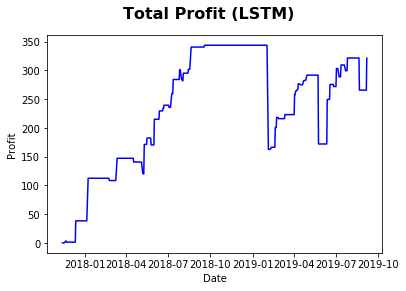

In [65]:
#More Dependencies
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots()
fig.suptitle("Total Profit (LSTM)", fontsize=16, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Profit")

ax.plot(profit_df.index, prt, '-b')
plt.show()